In [68]:
import pandas as pd
import numpy as np

letters = pd.read_csv("letterdata.csv")
letters.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [70]:
letters.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

train,test = train_test_split(letters, test_size = 0.20)

train_X = train.iloc[:, 1:]
train_y = train.iloc[:, 0]
test_X  = test.iloc[:, 1:]
test_y  = test.iloc[:, 0]

In [76]:
# kernel = linear
help(SVC)


Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [78]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.84925

In [80]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_X, train_y)
pred_test_rbf = model_rbf.predict(test_X)

np.mean(pred_test_rbf==test_y)

0.9245

In [85]:
################### Poly

model_poly = SVC(kernel = "poly")
model_poly.fit(train_X, train_y)

pred_test_poly = model_poly.predict(test_X)

print(np.mean(pred_test_poly == test_y))
print(pd.crosstab(pred_test_poly,test_y))

0.94725
letter    A    B    C    D    E    F    G    H    I    J  ...    Q    R    S  \
row_0                                                     ...                  
A       155    0    0    0    0    0    0    0    0    0  ...    1    0    3   
B         0  142    0    1    1    1    0    1    0    0  ...    0    7    1   
C         2    0  133    0    3    0    3    1    0    0  ...    1    0    0   
D         1    0    0  156    0    1    2    6    0    0  ...    0    2    0   
E         0    0    1    0  141    0    1    1    0    0  ...    2    0    1   
F         0    0    0    0    1  159    0    0    3    0  ...    0    0    1   
G         0    0    3    0    3    0  149    1    0    0  ...    1    1    0   
H         0    1    0    0    0    0    0  115    0    0  ...    0    2    0   
I         0    0    0    0    0    0    0    0  139    4  ...    0    0    0   
J         0    0    0    0    0    0    0    0    3  149  ...    0    0    1   
K         0    0    0    0    1 

In [89]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(train_X, train_y)

pred_test_poly = model_sigmoid.predict(test_X)

print(np.mean(pred_test_poly == test_y))
#print(pd.crosstab(pred_test_poly,test_y))

0.031


# forest fires

In [39]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns



In [47]:
forest=pd.read_csv("forestfires.csv")

In [49]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [59]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [51]:
forest=forest.iloc[:,2:]

forest.groupby("size_category").size()

size_category
large    139
small    378
dtype: int64

In [53]:
Label_enc=LabelEncoder()

forest["size_category"]=Label_enc.fit_transform(forest["size_category"])



In [61]:
forest_area_cor=forest.iloc[:,[8,0,1,2,3,4,-1]].corr()

In [11]:
forest_area_cor=forest.iloc[:,[8,7,6,5,4]].corr()

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

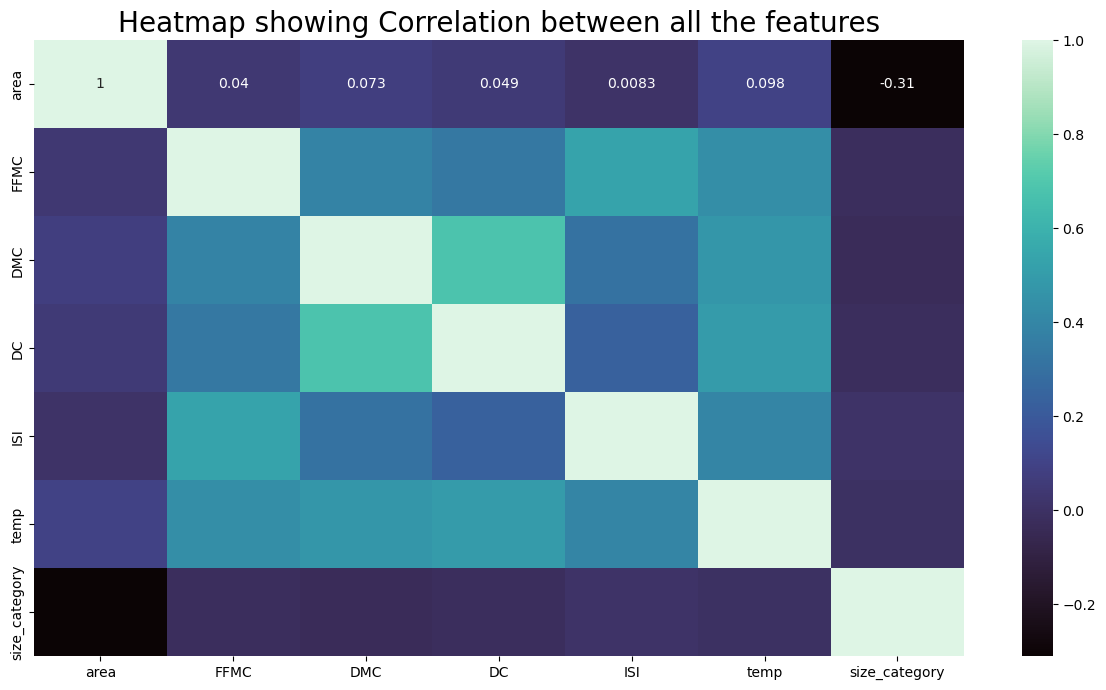

In [63]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(forest_area_cor,annot = True, cmap='mako')

In [13]:
forest.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [19]:
x=forest.loc[:,forest.columns!='size_category']
y=forest.loc[:,forest.columns=='size_category']

In [21]:
def scaling(data,s_type):
    if s_type=="stand":
        data=(data-data.mean())/(data.std())
        return data
    elif s_type=="sc":
        sc=StandardScaler()
        return sc.fit_transform(data)
    elif s_type=="norm":
        return (data-data.min())/(data.max()-data.min())
    
x=scaling(x,"stand")

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [25]:


###################### Linear


model_linear = SVC(kernel = "linear")
model_linear.fit(train_x, train_y["size_category"])


SVC(kernel='linear')

In [27]:
pred_test_linear = model_linear.predict(test_x)

print(np.mean(pred_test_linear == test_y["size_category"]))

print(pd.crosstab(pred_test_linear,test_y["size_category"]))



0.8942307692307693
size_category   0   1
row_0                
0              21   0
1              11  72


In [29]:


pred_train_linear = model_linear.predict(train_x)

print(np.mean(pred_train_linear == train_y["size_category"]))

print(pd.crosstab(pred_train_linear,train_y["size_category"]))

0.8958837772397095
size_category   0    1
row_0                 
0              65    1
1              42  305


In [31]:
################### Poly

model_poly = SVC(kernel = "poly")
model_poly.fit(train_x, train_y["size_category"])

pred_test_poly = model_poly.predict(test_x)

print(np.mean(pred_test_poly == test_y["size_category"]))
print(pd.crosstab(pred_test_poly,test_y["size_category"]))



0.6538461538461539
size_category   0   1
row_0                
0               0   4
1              32  68


In [33]:


pred_train_poly = model_poly.predict(train_x)

print(np.mean(pred_train_poly == train_y["size_category"]))
print(pd.crosstab(pred_train_poly,train_y["size_category"]))

0.8038740920096852
size_category   0    1
row_0                 
0              27    1
1              80  305


In [35]:


################################### rbf


model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_x, train_y["size_category"])

pred_test_rbf = model_rbf.predict(test_x)

print(np.mean(pred_test_rbf == test_y["size_category"]))
print(pd.crosstab(pred_test_rbf,test_y["size_category"]))
pred_train_rbf = model_rbf.predict(train_x)

print(np.mean(pred_train_rbf == train_y["size_category"]))
print(pd.crosstab(pred_train_rbf,train_y["size_category"]))

0.7403846153846154
size_category   0   1
row_0                
0               5   0
1              27  72
0.8038740920096852
size_category   0    1
row_0                 
0              26    0
1              81  306


In [37]:


################################# sigmoid

model_sig = SVC(kernel = "sigmoid")
model_sig.fit(train_x, train_y["size_category"])
pred_test_sig = model_sig.predict(test_x)


print(np.mean(pred_test_sig == test_y["size_category"]))
print(pd.crosstab(pred_test_sig,test_y["size_category"]))
pred_train_sig = model_sig.predict(train_x)

print(np.mean(pred_train_sig == train_y["size_category"]))
print(pd.crosstab(pred_train_sig,train_y["size_category"]))


0.7596153846153846
size_category   0   1
row_0                
0               9   2
1              23  70
0.7699757869249395
size_category   0    1
row_0                 
0              16    4
1              91  302
